In [74]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [75]:

import glob
import os

path = r'data/data-2' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)


## EDA

## Description of the clomns

# Columns 
'backers_count', 
'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [76]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [77]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,NaN,1.000000,28000.0,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.0,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.000000,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.000000,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,1489425776,False,NaN,1.308394,10000.0,596091328,NaN,False,NaN,1484245376,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,NaN,"{""key"":""assets/015/091/198/216fbf1bdc3739e7971...",136.0,"{""id"":2825329,""project_id"":2825329,""state"":""in...",the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,1357763527,False,NaN,1.000000,2800.0,998516049,NaN,False,NaN,1355171527,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,NaN,"{""key"":""assets/011/457/844/37ba63d35fefaba76e9...",2820.0,"{""id"":417385,""project_id"":417385,""state"":""inac...",help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.000000,domestic


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o


# candidates columns to be deleted:
> *blurb* : only non qualitativ descriptive information about the project 

> *category*: we keep it for future model processing. The values of this column are dictionary packed as string. It dosen't provide us directly with a quantitative value. Later may be we extract some usefull numerical information from it. 

> *creators* : same reasons as for categories  

> *currency_symbol*

> *currency_trailing_code*

> *slug*

> *source_url*

> *spotlight*

> *state_usd_rate*

> *urls*

> *friends* : it contains just NaN and "[ ]".

> *fx_rate* 

> *id*

> *is_starred*

> *is_backing*

> *location*

> *permissions*

> *photo*

> *pledged*

> *name*

> *profile*

# candidates for dummies
> *country*

> *currency*
# candidate for type-transformation

> *created_at* we want to have a DateTime type!

> *statechange_at* we want to have a DateTime datatype!

> *launched_at*

# *Target* : state

As we see in the foolowing code the currency, currency_symbol and currency_trailing_code are completly correlated. So we can delete two of them.

In [79]:
# in this code we show that all currencies not US dollars have a False value for currency_trailing_code variable.
len(df[(df['currency_symbol']=='€') & (df['currency_trailing_code']==True)])

0

In [80]:
# in this code we show that all currencies not US dollars have a False value for currency_trailing_code variable.
len(df[(df['friends'].isnull()) & (df['state']=="successful")])

117465

Here we delete the clomuns we don't need!

In [81]:
# in this cell we delete the unwanted columns!
df_1= df.drop(['blurb', 'category', 'creator', 'currency_symbol',
       'currency_trailing_code', 'friends', 'fx_rate', 'id',
       'is_backing', 'is_starred', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight',
       'static_usd_rate', 'urls'], axis=1)

In [82]:
# we change the type of columns "crerated_at", "launched_at", "deadline" and "state_changed_at". 
# We note that the unit of this columns is Second!
df_1[["created_at", "launched_at", "deadline", "state_changed_at"]] = df_1[["created_at", "launched_at", "deadline", "state_changed_at"]].apply(pd.to_datetime, unit='s')

In [83]:
df_1.head(2)

,backers_count,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,goal,is_starrable,launched_at,staff_pick,state,state_changed_at,usd_pledged,usd_type
0,315,28645,US,2018-11-05 23:06:45,USD,USD,2019-03-14 05:02:55,False,28000.0,False,2019-01-23 06:02:55,False,live,2019-01-23 06:02:55,28645.0,international
1,47,1950,US,2017-08-02 14:28:13,USD,USD,2017-09-09 17:00:59,False,1000.0,False,2017-08-10 17:00:59,False,successful,2017-09-09 17:00:59,1950.0,domestic


In [84]:
# In this cell we delete all rows of the dataframe with the state value of "live". 
# Because this rows do not tell us an thing about the succeed of the project.

df_1 = df_1[(df_1.state != "live")] 
df_1 = df_1[(df_1.state != "canceled")] 
df_1 = df_1[(df_1.state != "suspended")] 

#df_1 = df_1.drop(df_1[(df_1.state== "live") & (df_1.state=="suspended") & (df_1.state=="canceled")].index)


In [85]:
# Now we replace "successful" and "failed" with "1" and "o respectively". These are the values of our target column.
df_1["state"] = df_1["state"].replace(["successful", "failed"], [1, 0])

In [86]:
# we round the values of usd_pledged and goal
df_1[["goal","usd_pledged"]]=df_1[["goal","usd_pledged"]].round(0)

In [87]:
# we reset the index!
df_1 = df_1.reset_index(drop=True)

In [88]:
# 

In [89]:
df_1.nunique()

backers_count                 3206
converted_pledged_amount     30787
country                         22
created_at                  168890
currency                        14
current_currency                 2
deadline                    158484
disable_communication            1
goal                          4804
is_starrable                     1
launched_at                 168847
staff_pick                       2
state                            2
state_changed_at            158780
usd_pledged                  30775
usd_type                         2
dtype: int64

In [90]:
# As we see in the table above the features "disable_communication" and "is_starrable" just take one single value,
# meanings that they constant. Therefor they do npot provide us with any new insight into the data. 
# Therefore we delete the corresponding columns.
df_1= df_1.drop(["disable_communication", "is_starrable"], axis=1)

In [91]:
df_1.nunique()

backers_count                 3206
converted_pledged_amount     30787
country                         22
created_at                  168890
currency                        14
current_currency                 2
deadline                    158484
goal                          4804
launched_at                 168847
staff_pick                       2
state                            2
state_changed_at            158780
usd_pledged                  30775
usd_type                         2
dtype: int64

--- May be we should remove the "country from dummie-list"---

In [92]:
# In this cell we convert all categorical variable in dummies, so we can work in models.
df_2 = pd.get_dummies(df_1, columns=["country", "currency", "current_currency", "staff_pick", "usd_type"])
# Here is an alternative approach
# Using make_column_transformer to One-Hot Encode
'''
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset

transformer = make_column_transformer(
    (OneHotEncoder(), ['country']),
    remainder='passthrough')

transformed = transformer.fit_transform(df_1)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import make_column_transformer\nfrom seaborn import load_dataset\n\ntransformer = make_column_transformer(\n    (OneHotEncoder(), ['country']),\n    remainder='passthrough')\n\ntransformed = transformer.fit_transform(df_1)\ntransformed_df = pd.DataFrame(\n    transformed, \n    columns=transformer.get_feature_names()\n)\n"

In [93]:
# df_2 is the clean data with essential preproccessing steps done on it!

<AxesSubplot:xlabel='staff_pick_True', ylabel='state'>

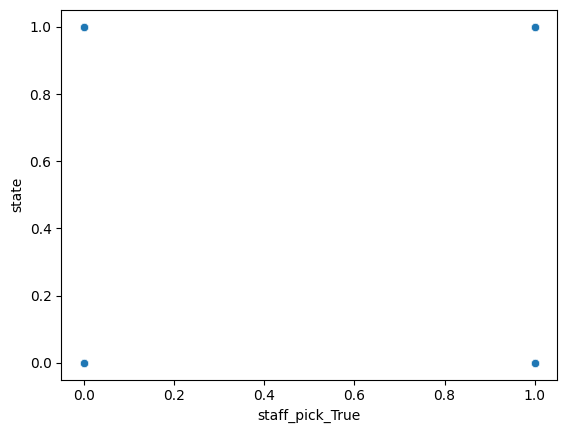

In [103]:
pd.set_option('display.max_columns', None)

#df_2.corr()

sns.scatterplot(data=df_2, x="staff_pick_True", y="state")